## Desicion 

* When there is no linear structure in the data, logistic regression models will not be able toperform well, as they try to find linear combinations among the feature variables. On theother hand, decision tree models will perform better for non-linear datasets, as they onlytry to partition the data at the purest levels they can.

In [45]:
from pyexpat import features

from matplotlib.pyplot import title
%matplotlib inline

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msn

In [47]:
df = pd.read_csv('bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<Axes: >

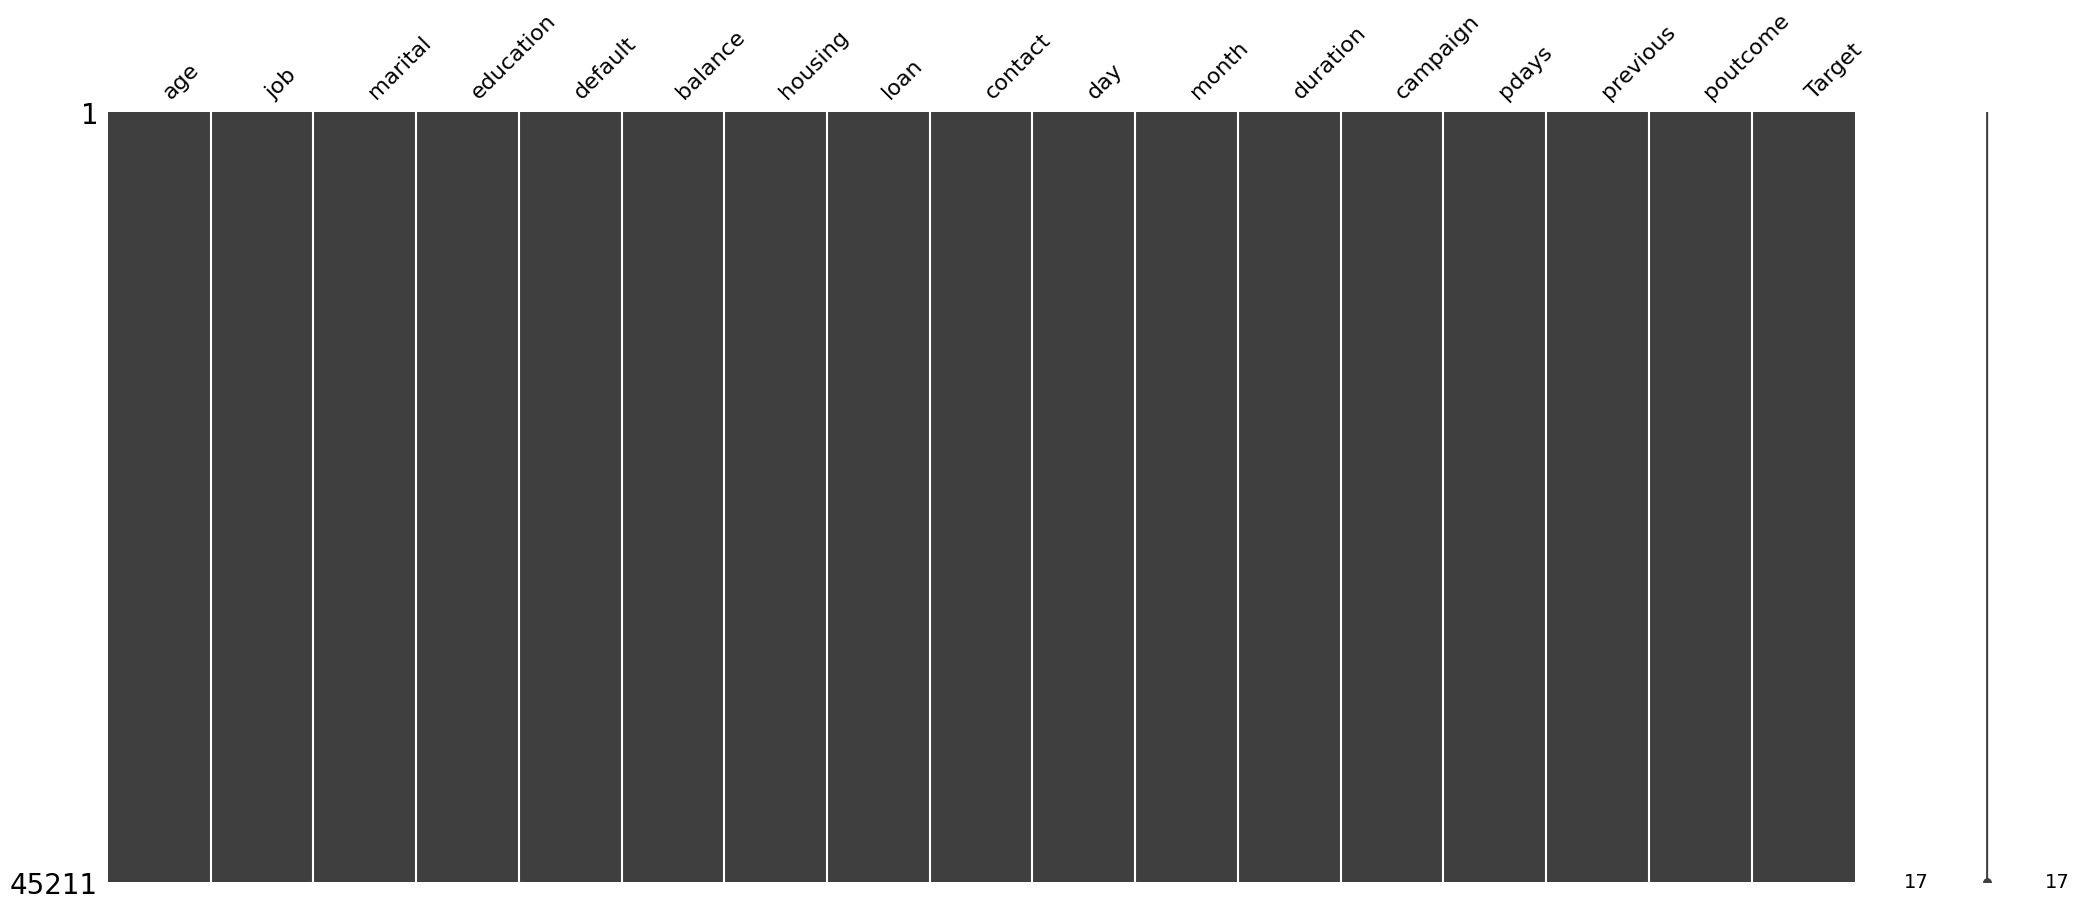

In [48]:
msn.matrix(df)

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


# Data Analysis

In [50]:
list(df.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'Target']

In [51]:
# encoded conversion by "y"
df['conversion'] = df['Target'].apply(lambda x: 0 if x == 'no' else 1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,conversion
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


- Conversion Rate

array([<Axes: ylabel='Target'>], dtype=object)

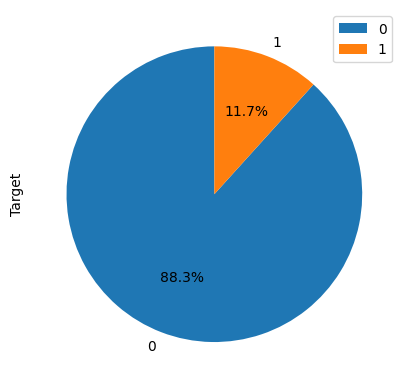

In [52]:
conversion_rate_df = pd.DataFrame(
    df.groupby(df['conversion'])['Target'].count() / df.shape[0] * 100
)
conversion_rate_df.plot(
    kind='pie',
    subplots=True,
    startangle=90,
    autopct='%1.1f%%'
)

- Conversion rate by marital status

In [53]:
df['marital'].value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

In [54]:
conversion_rate_by_marital = pd.DataFrame(
    df.groupby(df['marital'])['conversion'].sum() / df.groupby(df['marital'])['Target'].count() * 100
)
conversion_rate_by_marital

,0
marital,
divorced,11.945458
married,10.123466
single,14.949179


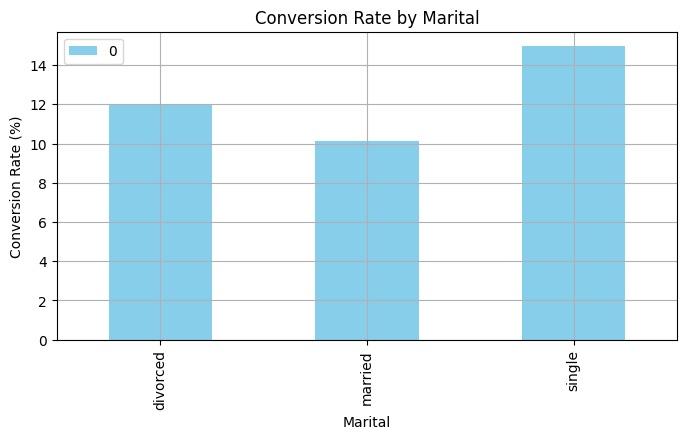

In [55]:
ax = conversion_rate_by_marital.plot(
    kind='bar',
    grid=True,
    figsize=(8, 4),
    color='skyblue',
    title='Conversion Rate by Marital'
)

ax.set_xlabel('Marital')
ax.set_ylabel('Conversion Rate (%)')
plt.show()

- Conversion Rates by Job

In [56]:
df['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

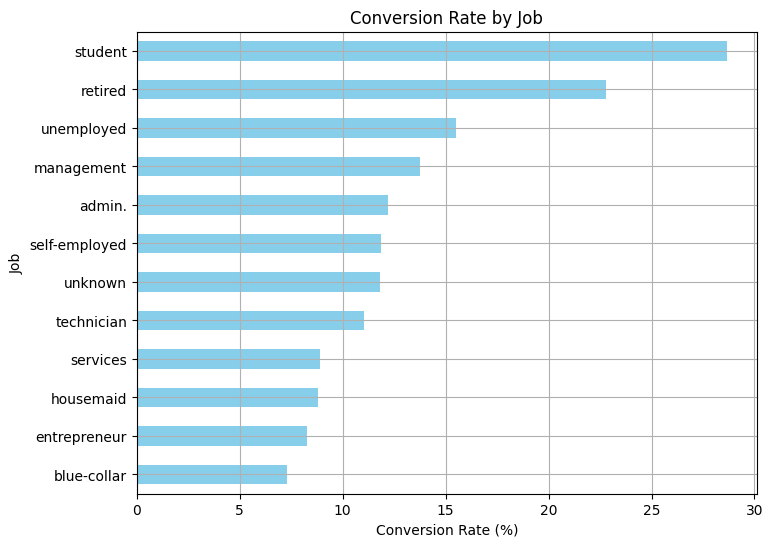

In [57]:
conversion_rate_by_job =  df.groupby(df['job'])['conversion'].sum() / df.groupby(df['job'])['conversion'].count() * 100
ax = conversion_rate_by_job.sort_values(ascending=True).plot(
    kind='barh',
    grid=True,
    figsize=(8, 6),
    title='Conversion Rate by Job',
    color='skyblue'
)

ax.set_xlabel('Conversion Rate (%)')
ax.set_ylabel('Job')
plt.show()


- Default Rates by Conversions

In [58]:
df['default'].value_counts()

default
no     44396
yes      815
Name: count, dtype: int64

In [59]:
df['default'] = df['default'].replace('unknown', 'yes')

In [60]:
df['default'].value_counts()

default
no     44396
yes      815
Name: count, dtype: int64

In [61]:
default_by_conversion_df = pd.pivot_table(
    df, values='default', index=['Target'], columns='conversion', aggfunc=len
)
default_by_conversion_df.columns = ['non_conversion', 'conversion']
default_by_conversion_df

,non_conversion,conversion
Target,,
no,39922.0,NaN
yes,NaN,5289.0


- Bank Balance by Conversions

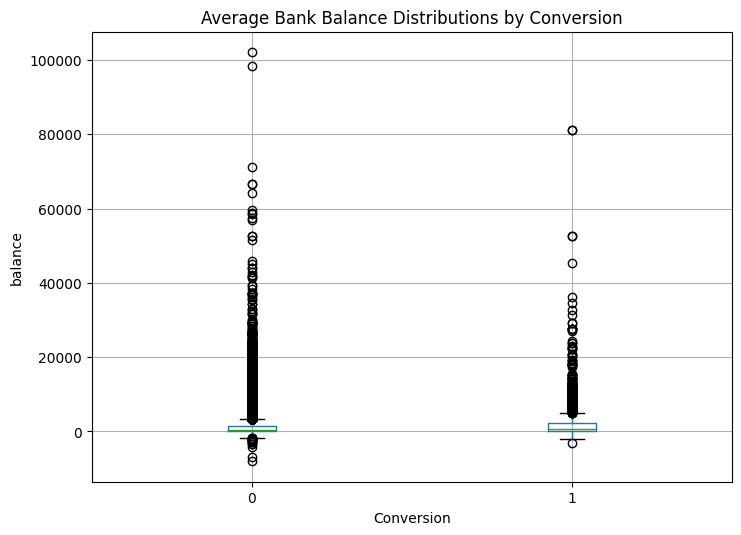

In [62]:
ax = df[['conversion', 'balance']].boxplot(
    by='conversion',
    showfliers=True,
    figsize=(8, 6)
)
ax.set_xlabel('Conversion')
ax.set_ylabel('balance')
ax.set_title('Average Bank Balance Distributions by Conversion')
plt.suptitle("")
plt.show()

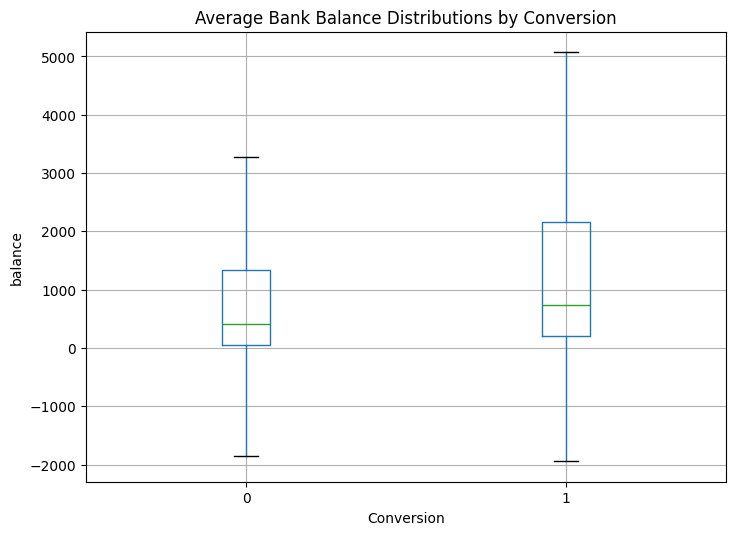

In [63]:
ax = df[['conversion', 'balance']].boxplot(
    by='conversion',
    showfliers=False,
    figsize=(8, 6)
)
ax.set_xlabel('Conversion')
ax.set_ylabel('balance')
ax.set_title('Average Bank Balance Distributions by Conversion')
plt.suptitle("")
plt.show()

- Conversion Rates by Number of Contact

In [64]:
conversion__rate_by_contact_df = df.groupby(
    df['campaign'])['conversion'].sum() / df.groupby(df['campaign'])['conversion'].count() * 100
conversion__rate_by_contact_df

campaign
1     14.597583
2     11.203519
3     11.193624
4      9.000568
5      7.879819
6      7.126259
7      6.394558
8      5.925926
9      6.422018
10     5.263158
11     7.960199
12     2.580645
13     4.511278
14     4.301075
15     4.761905
16     2.531646
17     8.695652
18     0.000000
19     0.000000
20     2.325581
21     2.857143
22     0.000000
23     0.000000
24     5.000000
25     0.000000
26     0.000000
27     0.000000
28     0.000000
29     6.250000
30     0.000000
31     0.000000
32    11.111111
33     0.000000
34     0.000000
35     0.000000
36     0.000000
37     0.000000
38     0.000000
39     0.000000
41     0.000000
43     0.000000
44     0.000000
46     0.000000
50     0.000000
51     0.000000
55     0.000000
58     0.000000
63     0.000000
Name: conversion, dtype: float64

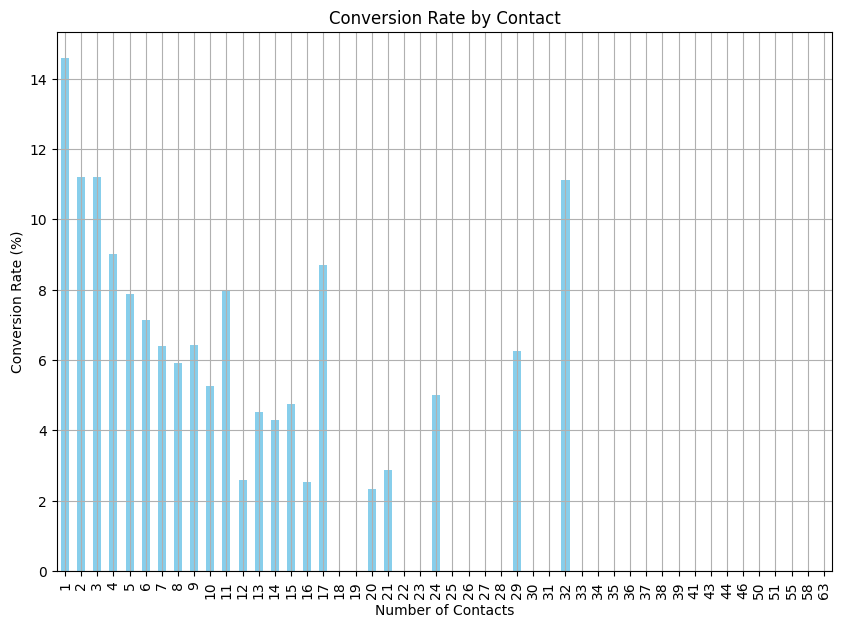

In [65]:
ax = conversion__rate_by_contact_df.plot(
    kind='bar',
    grid=True,
    figsize=(10, 7),
    color='skyblue',
    title='Conversion Rate by Contact'
)

ax.set_xlabel('Number of Contacts')
ax.set_ylabel('Conversion Rate (%)')

plt.show()

## 3. Encoding Categorical Variables

In [66]:
cat_df = df.select_dtypes(include=['object'])
cat_df.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'Target'],
      dtype='object')

In [67]:
categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']
df[categorical_vars].nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
dtype: int64

- Encoding month

In [68]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [69]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df['month'] = df['month'].apply(lambda x: months.index(x)+1)
df['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9])

array([<Axes: ylabel='conversion'>], dtype=object)

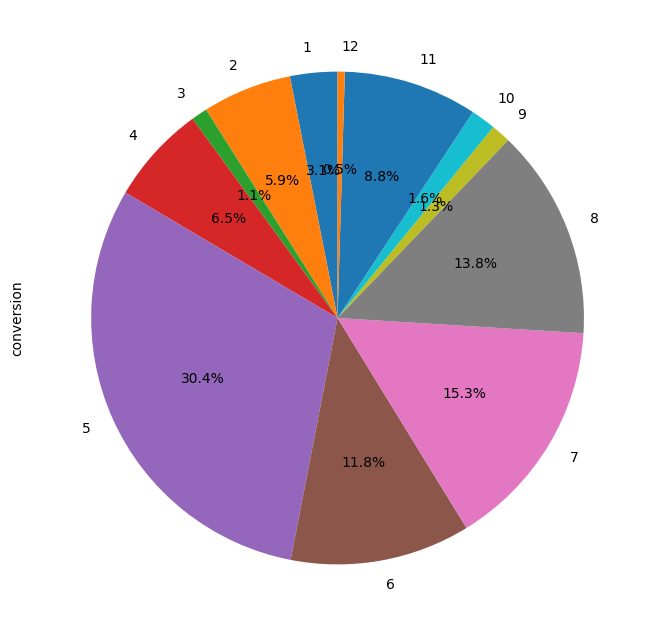

In [70]:
df.groupby(df['month'])['conversion'].count().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    subplots=True,
    figsize=(10, 8)
)

- Encoding Jobs

In [71]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [72]:
job_encoded_df = pd.get_dummies(df['job'])
job_encoded_df = job_encoded_df.astype('int')
job_encoded_df.columns = ['job_%s' % x for x in job_encoded_df.columns]
job_encoded_df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1


In [73]:
df = pd.concat([df, job_encoded_df], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,0,0,0,0,0,0,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,1


- Encoding Marital

In [74]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [75]:
marital_encoded_df = pd.get_dummies(df['marital'])
marital_encoded_df = marital_encoded_df.astype('int')
marital_encoded_df.columns = ['marital_%s' % x for x in marital_encoded_df.columns]
marital_encoded_df.head()

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [76]:
df = pd.concat([df, marital_encoded_df], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,1,0,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,0,0,0,0,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,1,0,0,1


- Encoding housing and loan

In [77]:
print(df['housing'].unique())
print(df['loan'].unique())

['yes' 'no']
['no' 'yes']


In [78]:
df['housing'] = df['housing'].apply(lambda x: 1 if x=='yes' else 0)
df['loan'] = df['loan'].apply(lambda x: 1 if x=='yes' else 0)

# 4. Fitting Decision Trees

In [79]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,management,married,tertiary,no,2143,1,0,unknown,5,...,0,0,0,0,0,0,0,0,1,0
1,44,technician,single,secondary,no,29,1,0,unknown,5,...,0,0,0,0,1,0,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,1,1,unknown,5,...,0,0,0,0,0,0,0,0,1,0
3,47,blue-collar,married,unknown,no,1506,1,0,unknown,5,...,0,0,0,0,0,0,0,0,1,0
4,33,unknown,single,unknown,no,1,0,0,unknown,5,...,0,0,0,0,0,0,1,0,0,1


In [80]:
features = [
    'age',
    'balance',
    'campaign',
    'previous',
    'housing',
] + list(job_encoded_df.columns) + list(marital_encoded_df.columns)

response_var = 'conversion'

In [81]:
features

['age',
 'balance',
 'campaign',
 'previous',
 'housing',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single']

In [82]:
from sklearn import tree

In [83]:
dt_model = tree.DecisionTreeClassifier(
    max_depth=4
)

In [84]:
dt_model.fit(df[features], df['conversion'])

DecisionTreeClassifier(max_depth=4)

In [85]:
dt_model.classes_

array([0, 1])

# 5. Interpreting Decision Tree Model

In [86]:
import graphviz

In [87]:
dot_data = tree.export_graphviz(
    dt_model,
    feature_names=features,
    class_names=['0', '1'],
    out_file=None,
    filled=True,
    rounded=True,
    special_characters=True
)

In [88]:
graph = graphviz.Source(dot_data)

/var/folders/hn/c6llvp_d7tb8qrb26k5k5r3w0000gn/T/ipykernel_84547/176354467.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


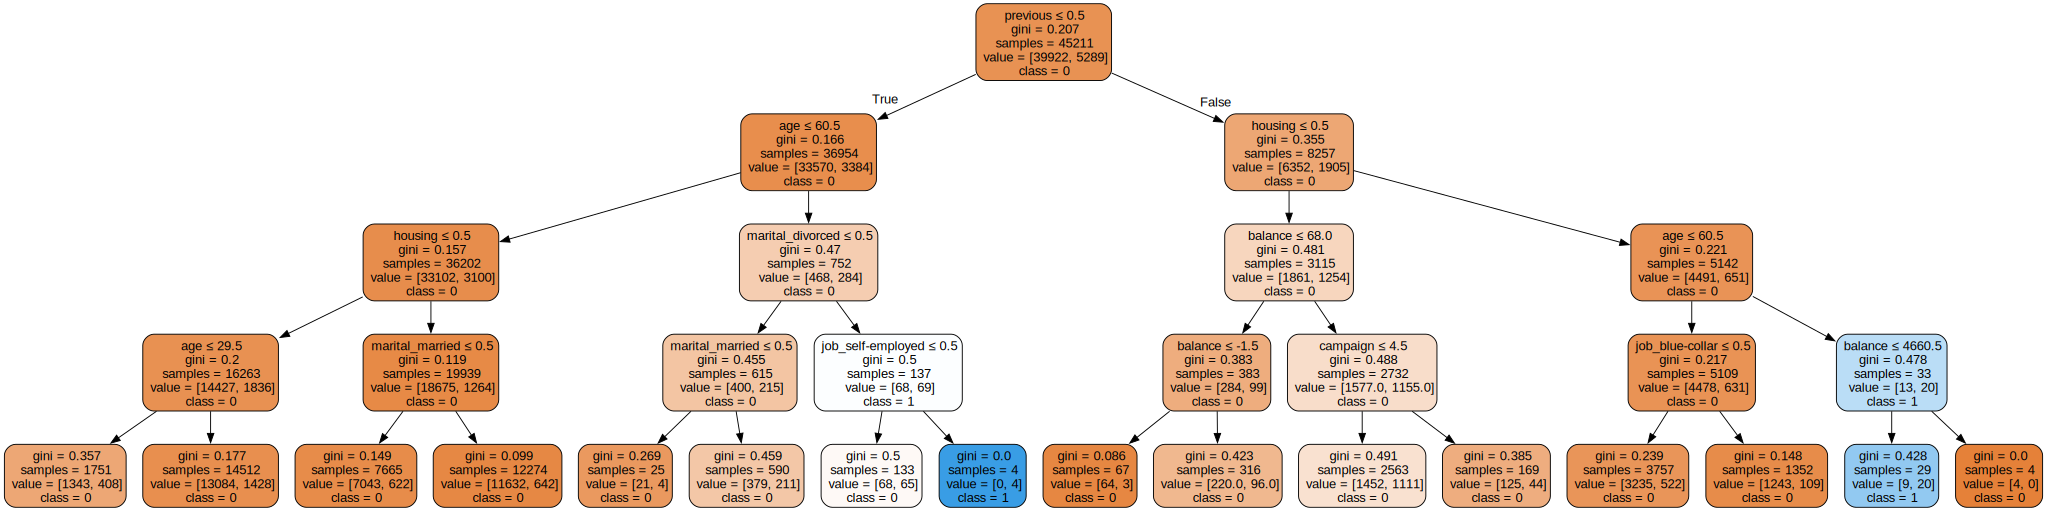

In [95]:
from IPython.core.display import display, HTML
display(HTML("<style>text {font-size: 10px;}</style>"))

graph